In [1]:
import numpy as np
import GPy
import pandas as pd
from GPy.kern import LinearSlopeBasisFuncKernel, DomainKernel, ChangePointBasisFuncKernel
from matplotlib import pyplot as plt
import pandas as pd
np.random.seed(1)

In [2]:
# OU model simulation
def OU(Tmax,beta,sigma,z0,dt):
    T = np.arange(0,Tmax,dt)
    n = len(T)
    Z = n*[0]
    Z[0] = z0 # set the initial value if you want to start with a different value rather than 0
    dW = np.random.randn(n)*np.sqrt(dt) 
    for i in range(1,n):
        Z[i] = Z[i-1] - beta*Z[i-1] * dt  + sigma *dW[i]
    return(Z) # mean 0 OU process

In [3]:
dt=0.001
Tmax=1
sigma =1 
beta=3
z0 = 0
T = np.arange(0,Tmax,dt)

In [4]:
x = np.array(OU(Tmax,beta,sigma,z0,dt))
x=(x-np.mean(x))/np.std(x)

In [5]:
t_column = T.reshape(-1,1)
x_column = x.reshape(-1,1)

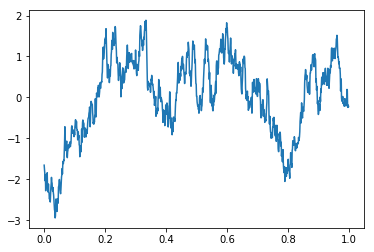

In [6]:
plt.plot(T,x)
plt.show()

In [7]:
t_column = t_column[::10]
x_column = x_column[::10]

 /home/pgrad1/2086253P/.local/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


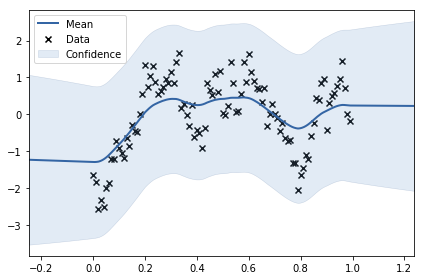

In [8]:
k=GPy.kern.OUMV(1,lengthscale=5.,variance=3)
# Make a GP regression model
m = GPy.models.GPRegression(t_column,x_column,k)
_=m.plot()

In [9]:
print(m)


Name : GP regression
Objective : 128.01052696334747
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  OUMV.variance            |    3.0  |      +ve      |        
  OUMV.lengthscale         |    5.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


In [10]:
m.optimize()

In [11]:
print(m)


Name : GP regression
Objective : 70.94394245894793
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  OUMV.variance            |   0.9981379046762273  |      +ve      |        
  OUMV.lengthscale         |  0.10109400935510031  |      +ve      |        
  Gaussian_noise.variance  |  0.03483499465561755  |      +ve      |        


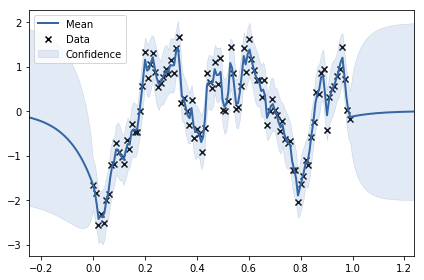

In [12]:
_=m.plot()

In [14]:
#Define the kernel and the model again 
k=GPy.kern.OUMV(1,lengthscale=5.,variance=3)
# Make a GP regression model
m = GPy.models.GPRegression(t_column,x_column,k)
print(m)


Name : GP regression
Objective : 128.01052696334747
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  OUMV.variance            |    3.0  |      +ve      |        
  OUMV.lengthscale         |    5.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


In [ ]:
hmc = GPy.inference.mcmc.HMC(m,stepsize=5e-2)
s = hmc.sample(num_samples=1000)

In [ ]:
A=s
variance_final_vector=[p[0] for p in A]# variance goes first in GPy
lengthscales_final_vector=[p[1] for p in A]
likelihood_variance_final_vector=[p[2] for p in A]
d = {'col1': variance_final_vector, 'col2':lengthscales_final_vector, 'col3':likelihood_variance_final_vector}
# here I need to switch variance with lengthscales
df = pd.DataFrame(data=d)#, dtype=np.int8)
df.columns=['GPR/kern/variance','GPR/kern/lengthscales','GPR/likelihood/variance']# changing the names
# here I need to switch between kernel variance and lengthscales
samples=df # rename it
plt.figure(figsize=(8,4))
for i, col in samples.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('HMC iteration')
plt.ylabel('Parameter value')

In [ ]:
labels=['Variance','Lengthscales','Noise variance']
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(131)
_=ax.plot(s[:,2],s[:,0],'k.', alpha = 0.15)
ax.set_xlabel(labels[2]); ax.set_ylabel(labels[0])
ax = fig.add_subplot(132)
_=ax.plot(s[:,2],s[:,1],'k.', alpha = 0.15)
ax.set_xlabel(labels[2]); ax.set_ylabel(labels[1])
ax = fig.add_subplot(133)
_=ax.plot(s[:,1],s[:,0],'k.', alpha = 0.15)
ax.set_xlabel(labels[1]); ax.set_ylabel(labels[0])

In [15]:
#MAP GPy Define the second model using their in-built kernel
k1=GPy.kern.Exponential(1,variance=3,lengthscale=5)
# Make a GP regression model
m1 = GPy.models.GPRegression(t_column,x_column,k1)

In [16]:
print(m1)


Name : GP regression
Objective : 128.01052696334747
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  Exponential.variance     |    3.0  |      +ve      |        
  Exponential.lengthscale  |    5.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


In [17]:
m1.optimize()
print(m1)


Name : GP regression
Objective : 70.94394245896237
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  Exponential.variance     |   0.9981373766064864  |      +ve      |        
  Exponential.lengthscale  |  0.10109375983952712  |      +ve      |        
  Gaussian_noise.variance  |  0.03483485279663241  |      +ve      |        


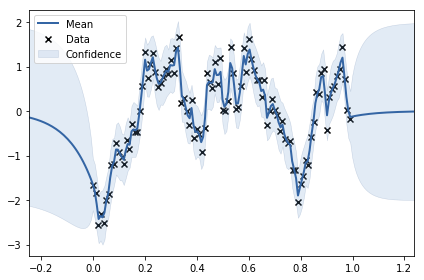

In [18]:
_=m1.plot()


In [ ]:
# they're identical

In [ ]:
k1=GPy.kern.Exponential(1,variance=3,lengthscale=5)
# Make a GP regression model
m1 = GPy.models.GPRegression(t_column,x_column,k1)

In [ ]:
print(m1)

In [ ]:
# try the HMC's
hmc = GPy.inference.mcmc.HMC(m1,stepsize=5e-2)
s = hmc.sample(num_samples=1000)

In [ ]:
A=s
variance_final_vector=[p[0] for p in A]# variance goes first in GPy
lengthscales_final_vector=[p[1] for p in A]
likelihood_variance_final_vector=[p[2] for p in A]
d = {'col1': variance_final_vector, 'col2':lengthscales_final_vector, 'col3':likelihood_variance_final_vector}
# here I need to switch variance with lengthscales
df = pd.DataFrame(data=d)#, dtype=np.int8)
df.columns=['GPR/kern/variance','GPR/kern/lengthscales','GPR/likelihood/variance']# changing the names
# here I need to switch between kernel variance and lengthscales
samples=df # rename it
plt.figure(figsize=(8,4))
for i, col in samples.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('HMC iteration')
plt.ylabel('Parameter value')

In [ ]:
labels=['Variance','Lengthscales','Noise variance']
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(131)
_=ax.plot(s[:,2],s[:,0],'k.', alpha = 0.15)
ax.set_xlabel(labels[2]); ax.set_ylabel(labels[0])
ax = fig.add_subplot(132)
_=ax.plot(s[:,2],s[:,1],'k.', alpha = 0.15)
ax.set_xlabel(labels[2]); ax.set_ylabel(labels[1])
ax = fig.add_subplot(133)
_=ax.plot(s[:,1],s[:,0],'k.', alpha = 0.15)
ax.set_xlabel(labels[1]); ax.set_ylabel(labels[0])